In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_adult = pd.read_csv('adult.csv', sep=',')
#print(df_adult.head())


# Question 1:

For question 1 dataset depicts general information of citizens from countries around the world.
Attributes include age, gender, marital status, hours per week spent at work, capital gains for the year, as well as capital losses, such that each observation is grouped into either an in come of greater 50,000 for the year or lessthan/equal to 50,000 for the year. 

In [112]:
#Group age data into bins for more clearer plot summary
ages = pd.DataFrame(df_adult, columns = ['age','hours-per-week'])

bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
ages['agerange'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)

print(ages.head())

   age  hours-per-week agerange
0   39              40    30-39
1   50              13    40-49
2   38              40    30-39
3   53              40    50-59
4   28              40    18-29


/Users/coreycoole/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/coreycoole/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


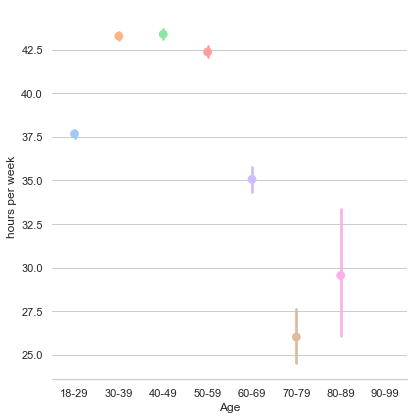

In [113]:
sns.set(style="whitegrid")

g = sns.factorplot(x='agerange', y="hours-per-week", data=ages,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("hours per week")
g.set_xlabels("Age")
plt.show()

In the above pointplot we can see a distinct trend of hours worked each week in relation to age however it is impossible to tell the exact hourly spread of each age group.

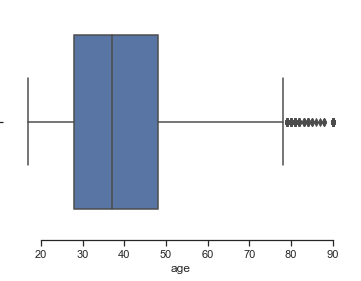

In [4]:
df1 = pd.DataFrame(df_adult, columns = ['age'])
ax = sns.boxplot(x='age',data=df1)  
sns.despine(offset=10, trim=True)
plt.show()

This box and whisker plot does a great job of showing the outliers in our data but does not do well to show us exactly what ages are outliers.

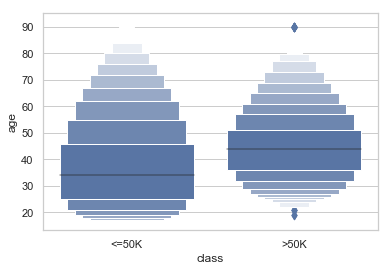

In [29]:
df3 = pd.DataFrame(df_adult, columns = ['age','class'])
sns.set(style="whitegrid")

class_ranking = ["<=50K", ">50K"]

sns.boxenplot(x="class", y="age",
              color="b", order=class_ranking,
              scale="linear", data=df3)

The above boxenplot does a great job of showcasing the distribution of ages between the two classes, 
however this plot makes it hard to compare age groups farther away from the mean.  

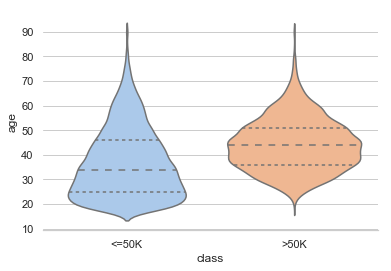

In [7]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="class", y="age",
               split=True, inner="quart",
               data=df3)
sns.despine(left=True)

Like the boxenplot, this violinplot does an excellent job of representing the largest concentrations of ages are in each class, however just like the boxen plot it is impossible to compare exact figures among the spread of ages. 

/Users/coreycoole/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


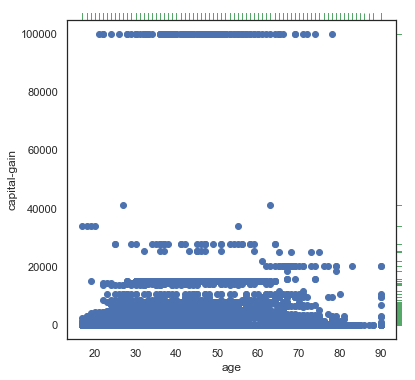

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

df4 = pd.DataFrame(df_adult, columns = ['age','capital-gain'])

# Use JointGrid directly to draw a custom plot
grid = sns.JointGrid(x = 'age', y = 'capital-gain', data = df4, space=0, height=6, ratio=50)
grid.plot_joint(plt.scatter, color="b")
grid.plot_marginals(sns.rugplot, height=1, color="g")

This scatterplot does really well to show us the distinct gap between capital gains classes, 
however all inferences must be at most qualitative since parsing exact values fro this plot is impossible.

/Users/coreycoole/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/coreycoole/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2880x720 with 0 Axes>

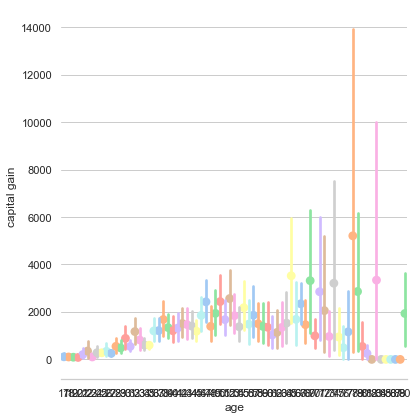

In [131]:
sns.set(style="whitegrid")

plt.figure(figsize = (40,10))
g = sns.factorplot(x="age", y="capital-gain", data=df4,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("capital gain")
g.set_xlabels("age")

plt.show()

Here we have another pointplot, where a general trend of capital gains in relation 
to age for the year is easily understood, however the age data would need to be grouped into bins if the we 
want to make any discenible inferences with respect to exact age. 

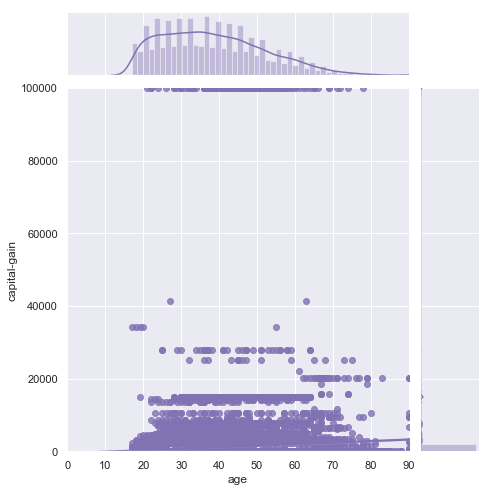

In [35]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot("age", "capital-gain", data=df4, kind="reg",
                  xlim=(0, 90), ylim=(0, 100000), color="m", height=7)

Hard to say what this plot may say about this particular dataset, similar to the scatter plots we can see a disctinct 
margin between capital gains classes, however this plot does not fit a regression line to the capital gains data.

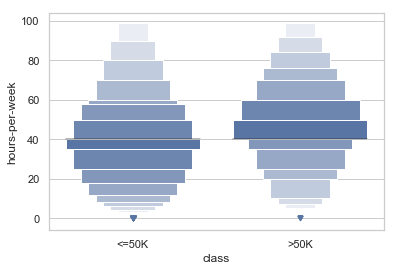

In [41]:
df5 = pd.DataFrame(df_adult, columns = ['class','hours-per-week'])

sns.set(style="whitegrid")

class_ranking = ["<=50K", ">50K"]

sns.boxenplot(x="class", y="hours-per-week",
              color="b", order=class_ranking,
              scale="linear", data=df5)

While this plot does a great job of showcasing the concentrations 
of hours worked per week in relation to class distinction, however data becomes hard to compare farther frothe mean.

/Users/coreycoole/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/coreycoole/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


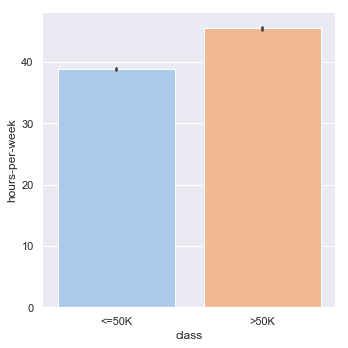

In [48]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(x="class", y="hours-per-week", data=df5,
                   size=5, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
plt.show()

This bar representation does a great job of showcasing the relative difference between the classes, but does not give 
us a information if we wanted to compare exact values.

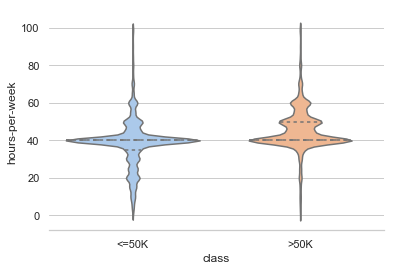

In [52]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="class", y="hours-per-week",
               split=True, inner="quart",
               data=df5)
sns.despine(left=True)

As with previous violin plots we can see distinct concetrations of hours worked per week, in this case expectly the 40 hour mark, as well as some of the residual week hours drifting above the averages. however it is impossible to compare exact concentration values farther away fromthe mean. 

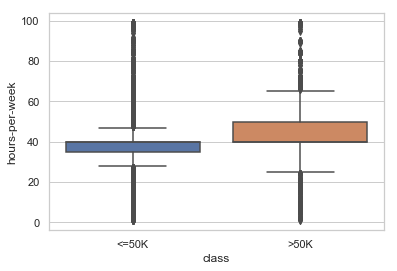

In [64]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.boxplot(x="class", y="hours-per-week", data=df5)

While this boxplot gives us a good representation of the mean's location in the data, 
it is hard to compare anyother aspect of the data because of the amount of outliers in relation to the data avergage. 

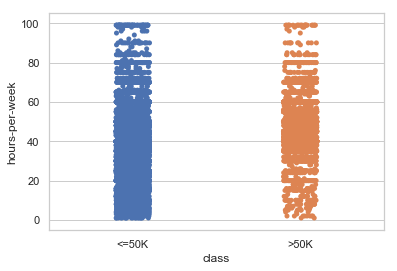

In [65]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.stripplot(x="class", y="hours-per-week", data=df5)

This plot shows us the maximum and minimum values in the hours data, 
unfortunately the multitude of data points leaves little more we can infer from the crowded plot.

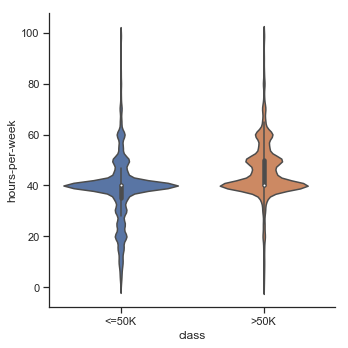

In [66]:
import seaborn as sns
sns.set(style="ticks")
g = sns.catplot(x="class", y="hours-per-week",
                data=df5, kind="violin")

Here we have a catagorical violin plot, as wiht the violin plot previously presented, the concetrations of hours data is easily understood however the smaller concentrations become hard to compare as we look farther away 
froim the mean values. 

In [71]:
df_fire = pd.read_csv('forestfires.csv', sep=',')
print(df_fire.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


# Question 2:

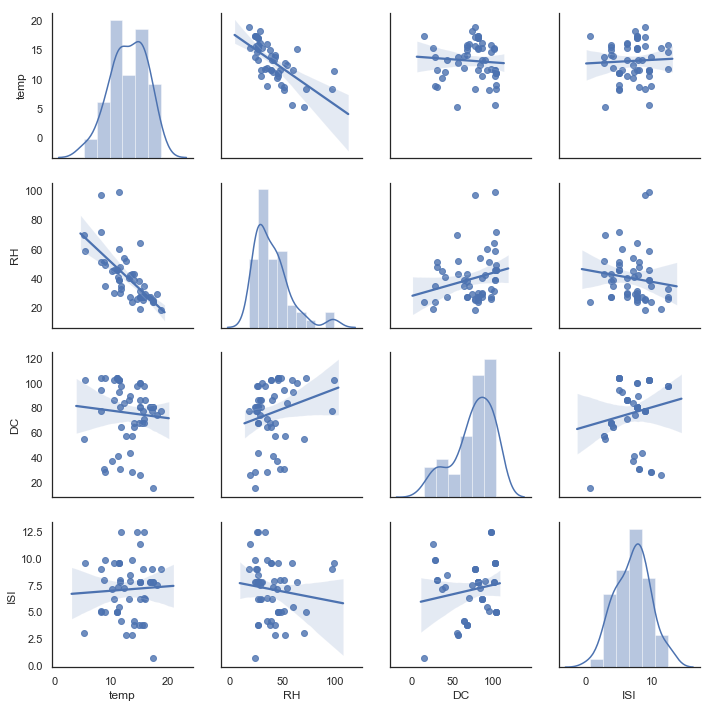

In [135]:
import seaborn as sns
sns.set(style="white")

df_mar = pd.DataFrame(df_fire[df_fire.month == 'mar'], columns = ['temp', 'RH', 'DC', 'ISI'])

g = sns.PairGrid(df_mar, diag_sharey=False)
g.map_lower(sns.regplot)
g.map_upper(sns.regplot)
g.map_diag(sns.distplot)


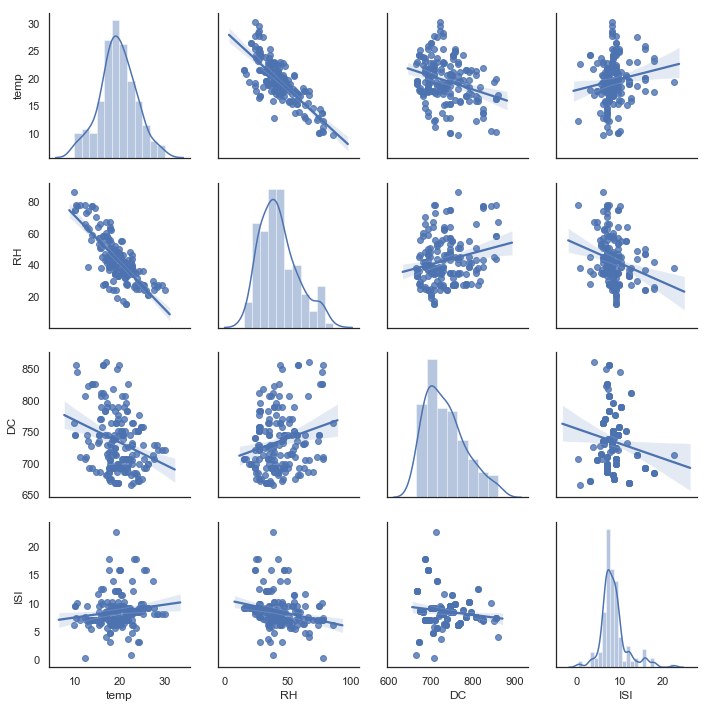

In [137]:
df_sep = pd.DataFrame(df_fire[df_fire.month == 'sep'], columns = ['temp', 'RH', 'DC', 'ISI'])

g = sns.PairGrid(df_sep, diag_sharey=False)
g.map_lower(sns.regplot)
g.map_upper(sns.regplot)
g.map_diag(sns.distplot)

Looking at the forest fire data, I parsed the attributes by month and compared the month of march(late spring) to the month of spetember(late summer) to get an image of forest fire indicators at distinct times of the year.

we first describe our chosen attributes: temp = temperature(C), RH = relative humidity(%), DC = Drought Code(numerical average of moisture content in deep ground), ISI = Initial spread index(numerical rating of expected rate of fire spread).

We can see the distributions of each attribute vary widely, as temperature seems most normally shaped, every other data catagory seems skewed. And we note that the peak temperature of september(27C-28C) at much higher than peak temperature in march(16C-17C).  

Analyzing the bivariate relationships, we see some expected outcomes. In relation to greater temperature values, relative humidity decrease, however the expected fire spread and drought code increase. We see in relation to higher humidity percentages, that temperature, drought code, and expected fire spread all decrease. We do not see drought code act as a convincing indicator for much else that a direct relationship to temperature values. However, in the context of ISI, the expected initial fire spread, we can see that with greater DC values and temp values greatly coorelate to greater ISI values and we also note a severe inverse relation ship between the RH and ISI values as one might expect. 

General trends between the two timeframes remian fairly similar, noteable however the relationship between the drought coefficient and the expected fire spread, as march relates a bivariate plot that indicates a direct relationship between ISI and DC however in september the plot depicts an inverse relationship. 